### Map:
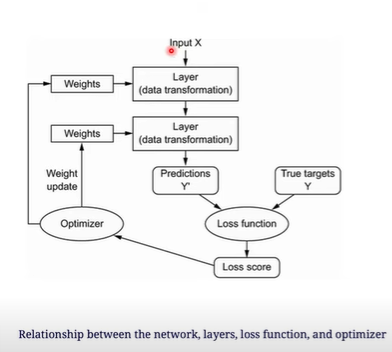
* import Lib

In [133]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
print(f"Tensorflow:{tf.__version__}")

Tensorflow:2.15.0


In [134]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

In [135]:
type(X_train), type(y_train), type(X_test), type(y_test)


(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [136]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [137]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [138]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[2]]

'T-shirt/top'

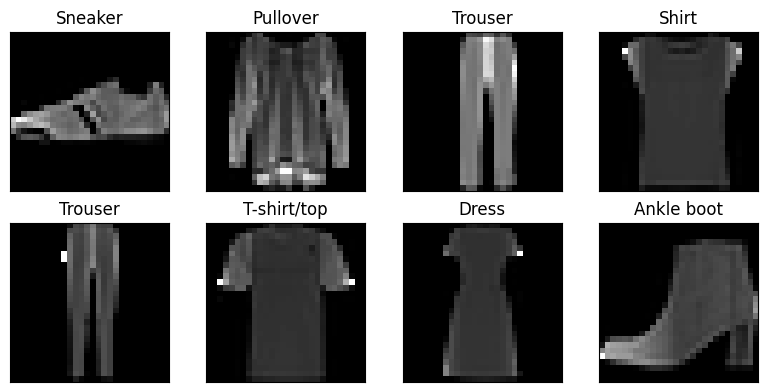

In [170]:
 from typing import Optional
def plot_data(X_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

  len_X =X_data.shape[0]
  for idx in range(nrows * ncols):
    ax=axes[idx//ncols, idx%ncols]

    img_idx = np.random.randint(0, len_X)
    ax.imshow(X_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])
    true_label_str=f"{class_names[y_data[img_idx]]}"

    if y_proba is not None:
      predicted_idx=np.argmax(y_proba[img_idx])
      predicted_label=class_names[predicted_idx]
      color='red' if predicted_idx!=y_data[img_idx] else color
      predicted_label_str=f"{predicted_label}"
    img_title=true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_title(class_names[y_data[img_idx]])
  plt.tight_layout()
  plt.show()
plot_data(X_train, y_train)

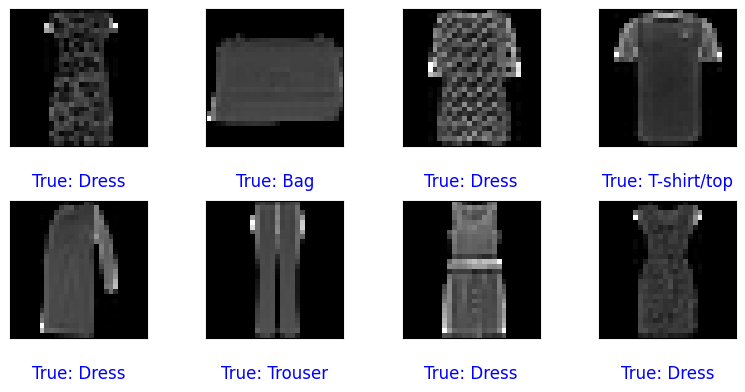

In [173]:
from typing import Optional
def plot_data(X_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

  len_X =X_data.shape[0]
  for idx in range(nrows * ncols):
    ax=axes[idx//ncols, idx%ncols]

    img_idx = np.random.randint(0, len_X)
    ax.imshow(X_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])
    color='blue'
    true_label_str=f"\nTrue: {class_names[y_data[img_idx]]}"

    if y_proba is not None:
      predicted_idx=np.argmax(y_proba[img_idx])
      predicted_label=class_names[predicted_idx]
      color='red' if predicted_idx !=y_data[img_idx] else color
      predicted_label_str=f"\nPredicted: {predicted_label}"

    img_title=true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title, color=color, fontsize=12)
  plt.tight_layout()
  plt.show()
plot_data(X_test, y_test)

### Image Pre-processing
* Reshaping it intothe shape the model expects and scaling it so that all values are in the `[0,1]` interval
* Trans from `unit` into a `float32`

In [141]:
from re import X
#convert to float32 & Scale images to the [0,1] range for training
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_test.shape, X_train.shape

((10000, 28, 28), (60000, 28, 28))

In [142]:
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(X_test, axis=1)

### Network(ANN) Architecture
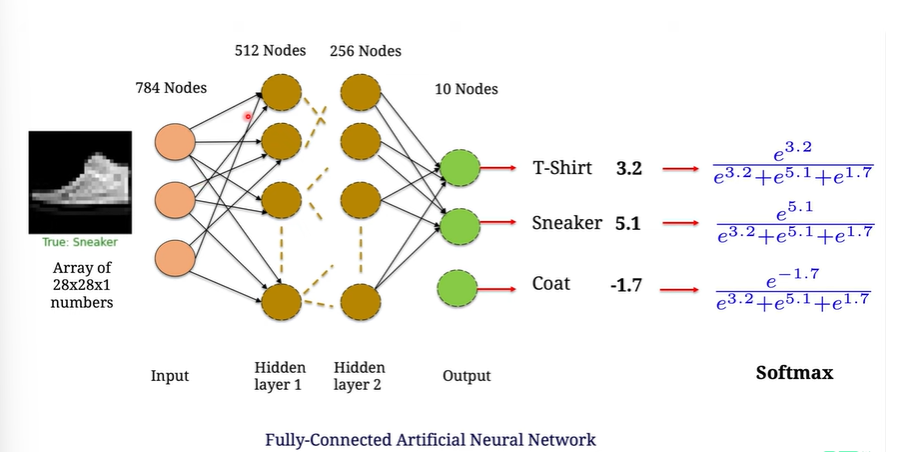

In [143]:
model=Sequential()

In [144]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [146]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4906 - accuracy: 0.8205 - val_loss: 0.4006 - val_accuracy: 0.8531
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3516 - accuracy: 0.8701 - val_loss: 0.3682 - val_accuracy: 0.8649
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3091 - accuracy: 0.8838 - val_loss: 0.3650 - val_accuracy: 0.8668
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2878 - accuracy: 0.8919 - val_loss: 0.3549 - val_accuracy: 0.8668
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2677 - accuracy: 0.8993 - val_loss: 0.3379 - val_accuracy: 0.8776
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2491 - accuracy: 0.9054 - val_loss: 0.3212 - val_accuracy: 0.8837
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2340 - accuracy: 0.9115 - val_loss: 0.3362 - val_accuracy: 0.8815
Epoch 

In [147]:
history_dict=history.history

In [148]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [149]:
train_loss=history_dict['loss']
val_loss=history_dict['val_loss']
train_acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

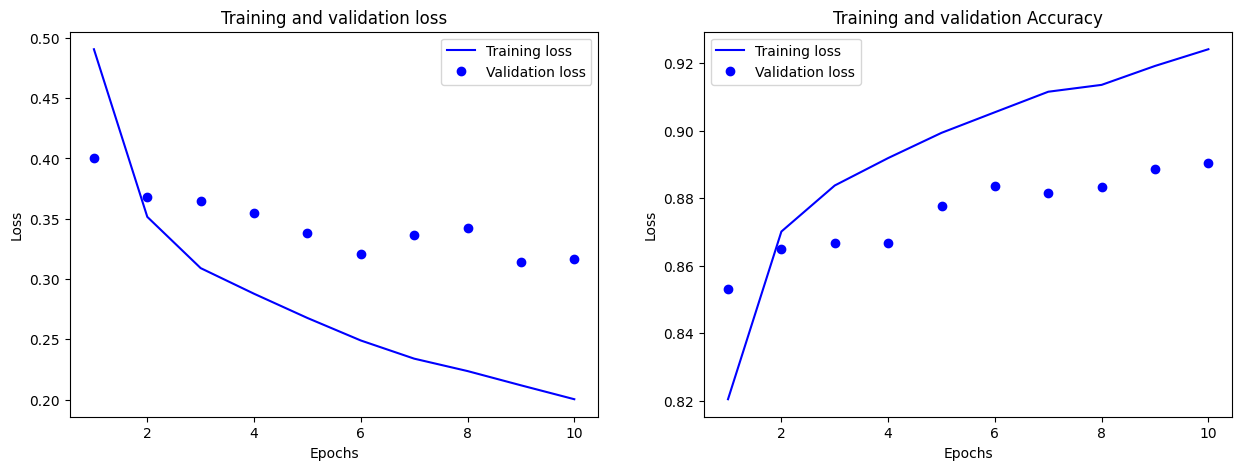

In [150]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
epoch_runs=range(1, len(train_loss)+1)

ax1.plot(epoch_runs, train_loss, 'b', label='Training loss')
ax1.plot(epoch_runs, val_loss, 'bo', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, 'b', label='Training loss')
ax2.plot(epoch_runs, val_acc, 'bo', label='Validation loss')
ax2.set_title('Training and validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

### Model Evaluation

In [151]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3162651062011719
Test accuracy: 0.890500009059906


### Prediction

In [152]:
X_sample=X_test[:3]
y_proba=model.predict(X_sample)

1/1 [==============================] - 0s 41ms/step


In [153]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.   ,
        0.984],
       [0.001, 0.   , 0.984, 0.   , 0.012, 0.   , 0.004, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [154]:
predictions=np.argmax(y_proba, axis=1)

In [155]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

In [156]:
y_proba=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


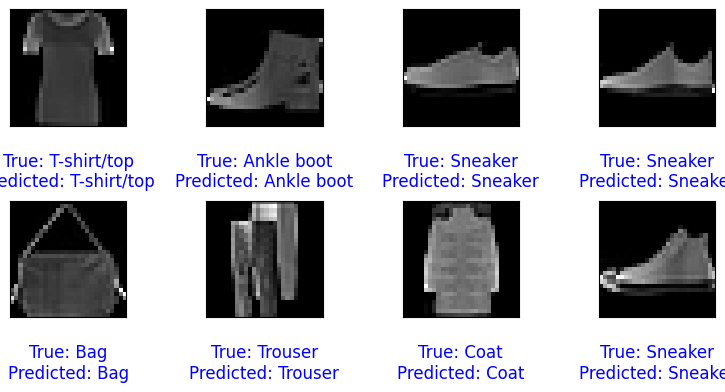

In [174]:
plot_data(X_test, y_test, y_proba)